In [98]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt


#import data from csv file to a dataframe
df = pd.read_csv("https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/860b0499-9901-4c00-b86a-a81399b0486a/resource/54c26a63-bf59-4424-9c57-a397b2812bac/download/Call%20for%20Service%20Types.csv")
df

,_id,Type_of_Incident,Call_for_Service_Type,Perceived_Race_of_People_Involv,Incident_Count,ObjectId
0,1,Enforcement Action Incidents,IN PROGRESS/JUST OCC'D,Latino,68.0,1
1,2,Enforcement Action Incidents,IN PROGRESS/JUST OCC'D,Middle Eastern,102.0,2
2,3,Enforcement Action Incidents,IN PROGRESS/JUST OCC'D,South Asian,102.0,3
3,4,Enforcement Action Incidents,IN PROGRESS/JUST OCC'D,White,1585.0,4
4,5,Enforcement Action Incidents,IN PROGRESS/JUST OCC'D,Multiple race group,297.0,5
...,...,...,...,...,...,...
171,172,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,Latino,312.0,172
172,173,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,Middle Eastern,602.0,173
173,174,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,South Asian,622.0,174
174,175,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,White,4576.0,175


In [99]:
#create a new column to add the cumulative sum of incidents by racial group 
df['total_incidents'] = df.groupby(['Perceived_Race_of_People_Involv'])['Incident_Count'].cumsum()

In [100]:
df

,_id,Type_of_Incident,Call_for_Service_Type,Perceived_Race_of_People_Involv,Incident_Count,ObjectId,total_incidents
0,1,Enforcement Action Incidents,IN PROGRESS/JUST OCC'D,Latino,68.0,1,68.0
1,2,Enforcement Action Incidents,IN PROGRESS/JUST OCC'D,Middle Eastern,102.0,2,102.0
2,3,Enforcement Action Incidents,IN PROGRESS/JUST OCC'D,South Asian,102.0,3,102.0
3,4,Enforcement Action Incidents,IN PROGRESS/JUST OCC'D,White,1585.0,4,1585.0
4,5,Enforcement Action Incidents,IN PROGRESS/JUST OCC'D,Multiple race group,297.0,5,297.0
...,...,...,...,...,...,...,...
171,172,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,Latino,312.0,172,1860.0
172,173,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,Middle Eastern,602.0,173,3695.0
173,174,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,South Asian,622.0,174,4156.0
174,175,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,White,4576.0,175,32290.0


In [101]:
#make new dataframe with relevant columns and rows

df_graph = df.iloc[168:175, 1:7]
df_graph


,Type_of_Incident,Call_for_Service_Type,Perceived_Race_of_People_Involv,Incident_Count,ObjectId,total_incidents
168,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,Black,3316.0,169,17909.0
169,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,East/Southeast Asian,810.0,170,5242.0
170,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,Indigenous,307.0,171,1782.0
171,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,Latino,312.0,172,1860.0
172,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,Middle Eastern,602.0,173,3695.0
173,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,South Asian,622.0,174,4156.0
174,Enforcement Action Incidents,VIOLENT CALLS FOR SERVICE,White,4576.0,175,32290.0


Text(5, 7.5, 'Number of police incidents in Toronto by race')

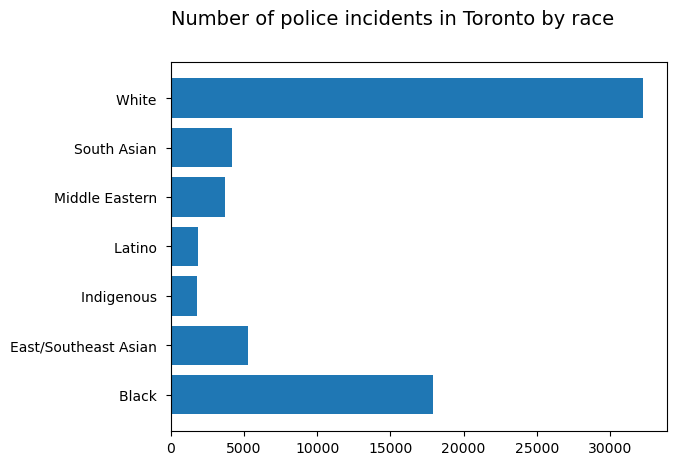

In [102]:
# create horizontal bar and add title
fig, ax = plt.subplots()
ax.barh(df_graph['Perceived_Race_of_People_Involv'], df_graph['total_incidents'])
ax.xaxis.set_major_locator(plt.MultipleLocator(5000))
ax.text(5, 7.5, "Number of police incidents in Toronto by race",
        ha='left',
        color = 'black',
        size = 14)